<a href="https://colab.research.google.com/github/kubohenrique/fraude_cartao/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. 

Apesar do surgimento constante de novos meios de pagamento, o cartão de crédito ainda concentra grande parte das transações do varejo brasileiro, justamente pela enorme quantidade de transações que isso significa — mais de R$ 1 trilhão  somente em 2019, segundo a Abecs (Associação Brasileira das Empresas de Cartões de Crédito).

Esse cenário faz com que grandes quadrilhas de fraudadores vivam em busca de meios para conseguir os dados desses cartões com o intuito de realizar aquilo que é um dos maiores pesadelos do varejo hoje em dia: a Fraude de Cartão de Crédito.

Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://image.freepik.com/vetores-gratis/hacker-colorido-e-plano-foge-homem-de-composicao-roubar-cartao-de-credito-e-executa-ilustracao-vetorial_1284-30699.jpg" width="80%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acarretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
#@title
!pip install scikit-plot

In [28]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

from imblearn.under_sampling import RandomUnderSampler

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [2]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

## Análise Exploratória


In [3]:
# Verificando as primeiras entradas do Dataset:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Verificando a dimensão do Dataset:

print('O Dataset possui {} linhas e {} colunas'.format(df.shape[0], df.shape[1]))

O Dataset possui 284807 linhas e 31 colunas


Agora irei fazer a análise estatística dos dados, como dito anteriormente, os dados de V1 até V28 tiveram suas dimensionalidades modificadas por PCA,e por se tratar de dados sigilosos, não sabemos o que cada um siggnifica. Desse modo o que vai nos ineressar são as variáveis `Time`, `Amount`, e a variável resposta `Class`.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Interessante notar algumas coisas por essa análise:
* Até 75% do valor de gastos, não ultrapassam os $77.00;
* Não possui dados nulos nesse dataset, podemos ver isso pela coluna `count`, mas vamos confirmar abaixo:

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* Como dito anteriormente, os dados estão desbalanceados pois existem muito mais casos de não fraudes do que de fraudes, que representam 0.17% do total de cados.
Vamos verificar isso graficamente:


In [7]:
df['Class'][df['Class'] == 1].value_counts() / df.shape[0] * 100

1    0.172749
Name: Class, dtype: float64

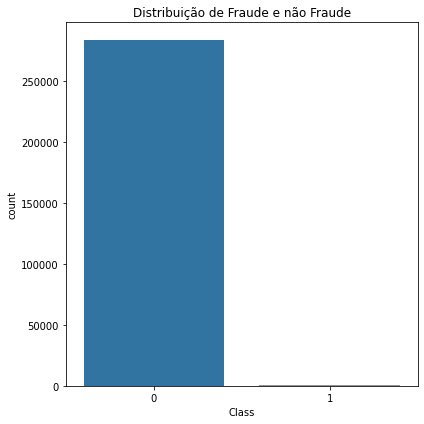

In [8]:
fig, ax = plt.subplots(figsize=(6,6))

sns.countplot(x='Class', data=df, ax=ax,)
ax.set_title('Distribuição de Fraude e não Fraude')

plt.tight_layout()

Verifiquei que:
* Realmente apenas 0.17% dos resultados são fraudes
* Graficamente, percebemos que o dataset está bem desbalanceado.


Vamos analisar agora as variáveis `Time` e `Amount`, pois são as unicas variáveis que sabemos o que significam e podemos observar o comportamento delas.

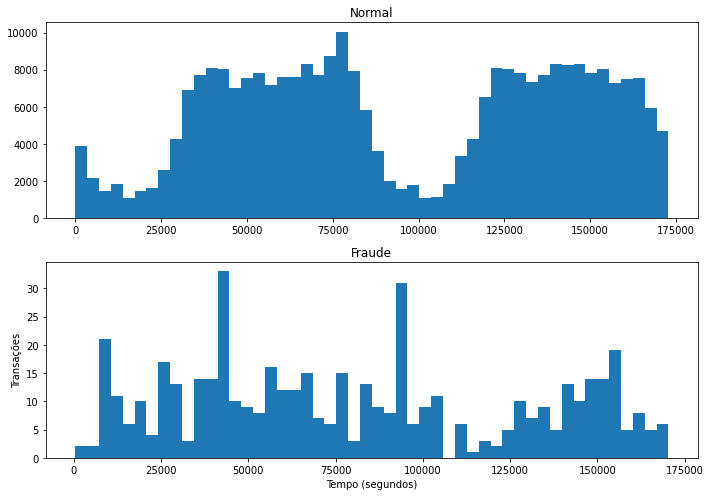

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(10,7))

ax[0].hist(df.Time[df.Class == 0], bins=50)
ax[0].set_title('Normal')

ax[1].hist(df.Time[df.Class == 1], bins=50)
ax[1].set_title('Fraude')

plt.xlabel('Tempo (segundos)')
plt.ylabel('Transações')
plt.tight_layout()

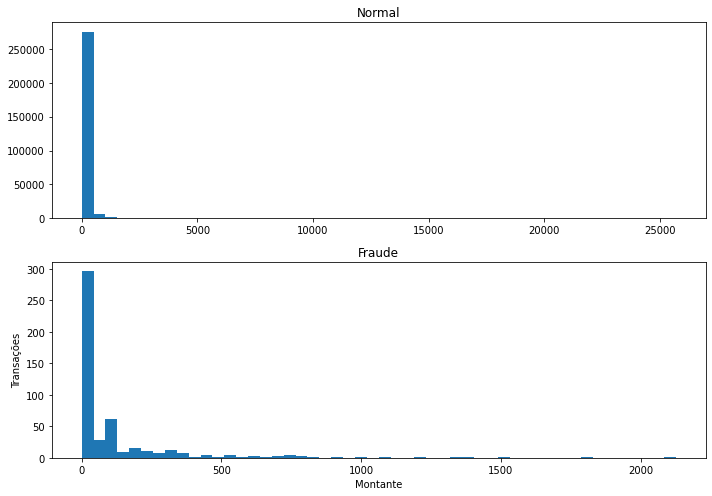

In [10]:
fig, ax = plt.subplots(2, 1, figsize=(10,7))

ax[0].hist(df.Amount[df.Class == 0], bins=50)
ax[0].set_title('Normal')

ax[1].hist(df.Amount[df.Class == 1], bins=50)
ax[1].set_title('Fraude')

plt.xlabel('Montante')
plt.ylabel('Transações')
plt.tight_layout()

* Não pode se observar muita coisa a partir desses gráficos
* A variável `Amount` possui outliers, pois podemos observar que a maior parte das transações ocorrem em uma faixa menos de preço.

Irei fazer os boxplots para verificar os outilers da variável `Amount`:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


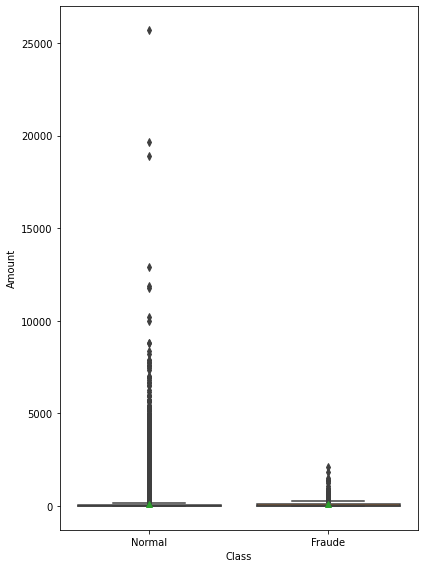

In [11]:
fig, ax = plt.subplots(figsize=(6,8), sharex=True)

sns.boxplot(df['Class'], df['Amount'], showmeans=True, ax=ax)

plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

* Confimei que há outliers aqui, e por isso irei limitar o intervalo, limitei para o montante de 500:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


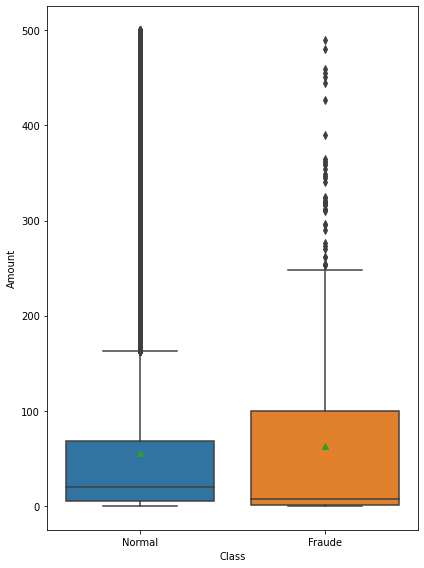

In [12]:
fig, ax = plt.subplots(figsize=(6,8), sharex=True)

sns.boxplot(df['Class'], df['Amount'][df['Amount'] < 500], showmeans=True, ax=ax)

plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

In [13]:
df[ (df['Class'] == 1) & (df['Amount'] < 1000)]['Amount'].describe()

count    483.000000
mean      97.082070
std      175.731723
min        0.000000
25%        1.000000
50%        8.540000
75%      100.745000
max      996.270000
Name: Amount, dtype: float64

* Tentando limitar o outlier podemos notar que até 75% do gosto é de até $$ 100.00
* A mediana de gastos da fraude é de $ 8.54
* As variáveis `Time` e `Amount` não estão normalizadas.

## Preparação dos Dados


Usarei o modelo de regressão logística para esse problema e para alimentar o modelo precisamos:
* Padronizar as features Time e Amount.
* Dividir entre dados de treino e teste.
* Balancear os dados a fim de evitar um viés de sempre dar como não fraude e assim overfitar.

In [14]:
# padronizar as colunas Time e Amount
df2 = df.copy()

rbst = RobustScaler()
df2['rbst_amount'] = rbst.fit_transform(df2['Amount'].values.reshape(-1, 1))
df2['rbst_time'] = rbst.fit_transform(df2['Time'].values.reshape(-1, 1))

df2.drop(['Time', 'Amount'], axis=1, inplace=True)

In [15]:
# Separar em Treino e Teste

X = df2.drop('Class', axis=1)
y = df2['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y)

1    356
0    356
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


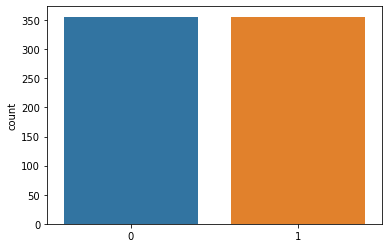

In [16]:
# Balancear os dados

# usar técnica under-sampling
rdm = RandomUnderSampler()
X_rdm, y_rdm = rdm.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rdm).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rdm);

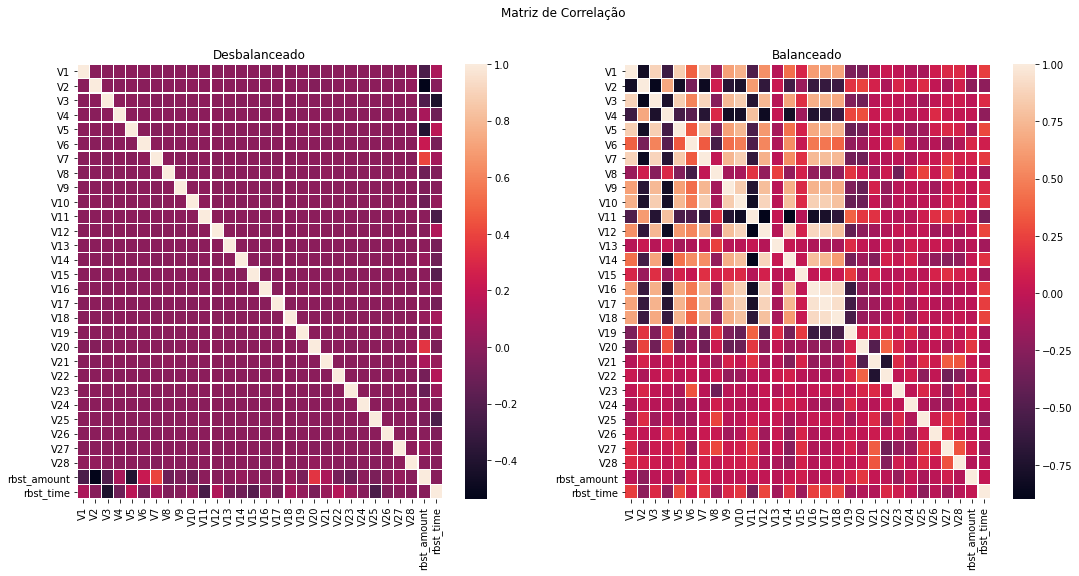

In [18]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rdm = pd.DataFrame(X_rdm).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rdm, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

Por esse gráfico de correlação percebemos que:
* Quando os dados estão desbalanceados, não conseguimos obter quase nenhuma informação.
* Já nos dados balanceados há visivelmente mais informações para serem obtidas.

## Modelo de Machine Learning


Vou usar os modelos de Regressão logística e de Árvore de Decisão para o modelo de Machine Learning, vou verificar qual dos dois apresentou um resultado melhor.

Para esse modelo usarei os dados balanceados (X_rdm e y_rdm) para treinar, e depois fazer as previsões em cima dos dados de teste,

### Regressão Logística

In [30]:
# Fit do modelo (Treinar)
model = LogisticRegression()
model.fit(X_rdm, y_rdm)

# Previsão
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

### Arvore de Decisão

In [31]:
# Fit do modelo (Treinar)
model2 = DecisionTreeClassifier()
model2.fit(X_rdm, y_rdm)

# Previsão
y_pred2 = model2.predict(X_test)
y_proba2 = model2.predict_proba(X_test)

## Avaliar o desempenho do modelo


### Regressão Logística

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9592    0.9791     71066
           1     0.0413    0.9191    0.0790       136

    accuracy                         0.9591     71202
   macro avg     0.5206    0.9391    0.5291     71202
weighted avg     0.9980    0.9591    0.9774     71202



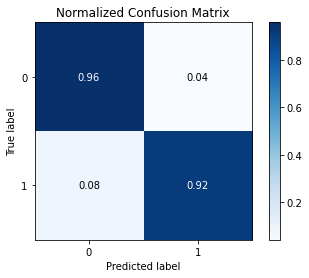

In [29]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

### Árvore de Decisão

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9055    0.9504     71066
           1     0.0188    0.9485    0.0370       136

    accuracy                         0.9056     71202
   macro avg     0.5094    0.9270    0.4937     71202
weighted avg     0.9980    0.9056    0.9486     71202



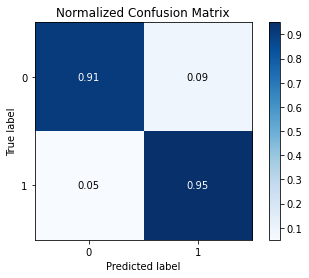

In [32]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred2, normalize=True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred2, digits=4))

## Conclusão

* Os dois modelos estão quase similares em suas previsões
* Entre as duas, a melhor escolha seria o modelo de árvore de decisão, pois ele apresenta um resultado ligeiramente superior para previr casos de fraude (1), e é isso que esse projeto está proposto
* Ainda cabem melhorias, como por exemplo fazer um fine tunning, e escolher os melhores hyperparametros.